In [57]:
# Importing important modules for performing analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing sample data

data = pd.read_csv("chipotle_sample_data.csv", delimiter= "\t")

In [3]:
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## Performing Sales Analysis

In [4]:
# Finding all the columns with missing instances

data.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# Converting the item_price from string to float

data['item_price'] = data['item_price'].str.replace("$", "").astype(float)

In [6]:
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [8]:
# Replacing the empty instances with boolean value

data['choice_description'].fillna('none', inplace = True)

In [9]:
# Performing the sales analysis

sales_analysis = data.groupby('item_name').agg(
    Total_Order = pd.NamedAgg(column='quantity', aggfunc= 'sum'),
    Total_Sales = pd.NamedAgg(column='item_price', aggfunc= 'sum') 
).reset_index().sort_values(by= 'Total_Sales', ascending= False)

In [10]:
sales_analysis.head()

,item_name,Total_Order,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04


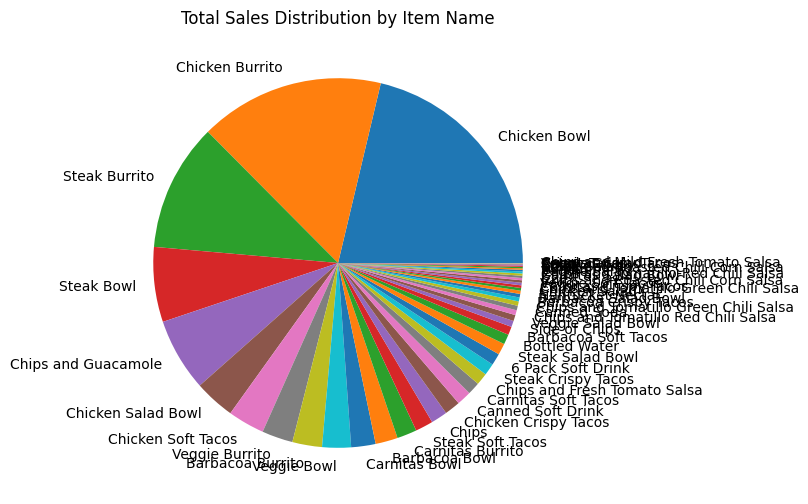

In [11]:
# Pie Plot to show the Total sales distribution of every items

plt.figure(figsize= (10, 6))
plt.pie(sales_analysis['Total_Sales'], labels= sales_analysis['item_name'])
plt.title('Total Sales Distribution by Item Name')
plt.show()

## Customer Preference Analysis

In [12]:
# Finding the top 10 popular items

popular_items = sales_analysis.head(10)['item_name']
popular_items

17           Chicken Bowl
18        Chicken Burrito
39          Steak Burrito
38             Steak Bowl
25    Chips and Guacamole
21     Chicken Salad Bowl
22     Chicken Soft Tacos
45         Veggie Burrito
2        Barbacoa Burrito
44            Veggie Bowl
Name: item_name, dtype: object

In [13]:
# Popular choices based on the item names

items_in_popular_items = data['item_name'].isin(popular_items)
data[items_in_popular_items].groupby('item_name')['choice_description'].value_counts().head()

item_name         choice_description                                                                      
Barbacoa Burrito  [Tomatillo Red Chili Salsa, [Rice, Cheese, Lettuce]]                                        9
                  [Tomatillo-Green Chili Salsa (Medium), [Rice, Cheese, Sour Cream, Lettuce]]                 4
                  [Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]                                  2
                  [Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Sour Cream, Lettuce]]                      2
                  [Roasted Chili Corn Salsa (Medium), [Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]    2
Name: count, dtype: int64

## Order Quantity Prediction Using Linear Regression

In [14]:
# Descriptive Feature

order_price = data[['item_price']]

In [15]:
# Target Feature

order_quantity = data[['quantity']]

In [16]:
# Performing Linear Regression on the data (Base Model)

lr = LinearRegression()

In [17]:
# Fitting the features to the model

lr.fit(order_price, order_quantity)

LinearRegression()

In [18]:
# Splitting the data into 80:20; 80% of data for training and 20% of data for testing

df_train, df_test, tf_train, tf_test = train_test_split(order_price, order_quantity, test_size=0.2)

In [19]:
# Generating prediction of the model

tf_pred = lr.predict(df_test)

Text(0.5, 1.0, 'Item Price vs Quantity Ordered')

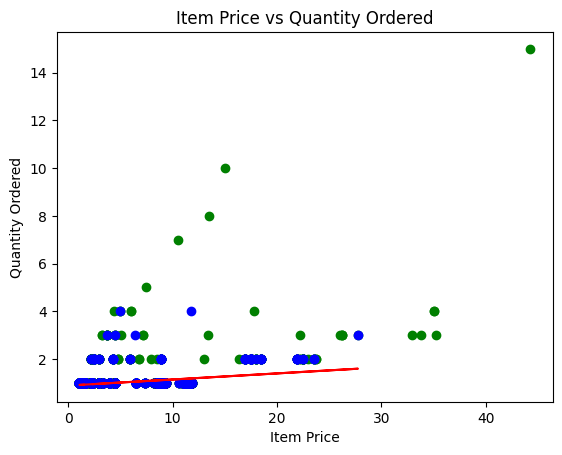

In [20]:
# Comparison of training dataset, testing dataset and the linear regression

plt.scatter(df_train, tf_train, color= 'green', label= 'Training Dataset')
plt.scatter(df_test, tf_test, color= 'blue', label= 'Testing Dataset')
plt.plot(df_test, tf_pred, color= 'red', label= 'Linear Regression')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')

## Order Quantity Prediction Using Tuned Linear Regression

In [23]:
# Performing Linear Regression on the data (Tuned Model)

# Creating a pipeline for Linear Regression and applying Scaling

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])

In [24]:
# Assigning hyperparameters for a tuned model

param_grid = {'lr__fit_intercept': [True, False]}

In [49]:
# Creating a tuned model using Grid Search

lr_tuned = GridSearchCV(pipe, param_grid, cv=10)

In [50]:
# Training the tuned model

lr_tuned.fit(df_train, tf_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__fit_intercept': [True, False]})

In [51]:
# Obtaining the best parameters for the tuned model

print(lr_tuned.best_params_)

{'lr__fit_intercept': True}


In [52]:
# Prediction using the tuned model

tf_pred_tuned = lr_tuned.predict(df_test)

Text(0.5, 1.0, 'Item Price vs Quantity Ordered')

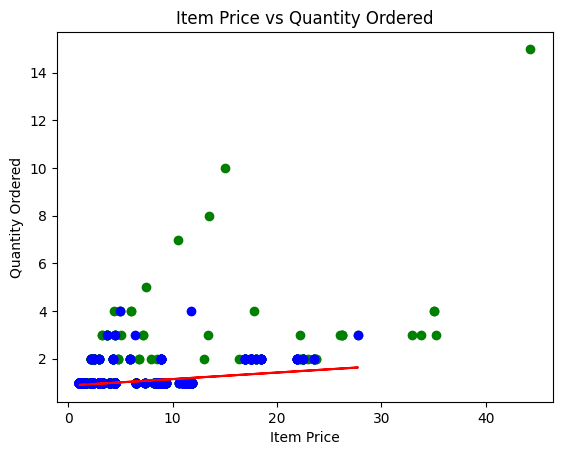

In [53]:
# Comparison of training dataset, testing dataset and the linear regression

plt.scatter(df_train, tf_train, color= 'green', label= 'Training Dataset')
plt.scatter(df_test, tf_test, color= 'blue', label= 'Testing Dataset')
plt.plot(df_test, tf_pred_tuned, color= 'red', label= 'Tuned Linear Regression')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')

In [63]:
# Finding the Mean Squared Error of the base Linear Regression Model

mse = mean_squared_error(tf_test, tf_pred)
print("The mean squared error for the base model: ", mse)

# Finding the Mean Absolute Error of the base Linear Regression Model

mae = mean_absolute_error(tf_test, tf_pred)
print("The mean absolute error for the base model: ", mae)

# Finding the R² Score of the base Linear Regression Model

r2 = r2_score(tf_test, tf_pred)
print("The R² score for the base model: ", r2)

The mean squared error for the base model:  0.07910454646483821
The mean absolute error for the base model:  0.15217826446685093
The R² score for the base model:  0.04943784662410544


In [64]:
# Finding the Mean Squared Error of the tuned Linear Regression Model

mse_tuned = mean_squared_error(tf_test, tf_pred_tuned)
print("The mean squared error for the tuned model: ", mse_tuned)

# Finding the Mean Absolute Error of the tune Linear Regression Model

mae_tuned = mean_absolute_error(tf_test, tf_pred_tuned)
print("The mean absolute error for the tuned model: ", mae_tuned)

# Finding the R² Score of the tuned Linear Regression Model

r2 = r2_score(tf_test, tf_pred_tuned)
print("The R² score for the tuned model: ", r2)

The mean squared error for the tuned model:  0.07978775636501603
The mean absolute error for the tuned model:  0.1580615558681412
The R² score for the tuned model:  0.041228034382663314


## K-Means Algorithm For Customer Segments Based On Orders

In [24]:
# Grouping data by the id and creating another dataset with the grouped id, total quantity (of specific id) and total spent (of specific id)

ordered_data = data.groupby('order_id').agg(
                            Total_Items = pd.NamedAgg(column= 'quantity', aggfunc= 'sum'),
                            Total_Spent = pd.NamedAgg(column= 'item_price', aggfunc = 'sum')
                            ).reset_index()

In [25]:
ordered_data.head()

,order_id,Total_Items,Total_Spent
0,1,4,11.56
1,2,2,16.98
2,3,2,12.67
3,4,2,21.00
4,5,2,13.70


In [26]:
# Creating a KMeans model with 3 clusters

k_means = KMeans(n_clusters = 3)

In [27]:
order_segments = k_means.fit_predict(ordered_data[['Total_Items', 'Total_Spent']])

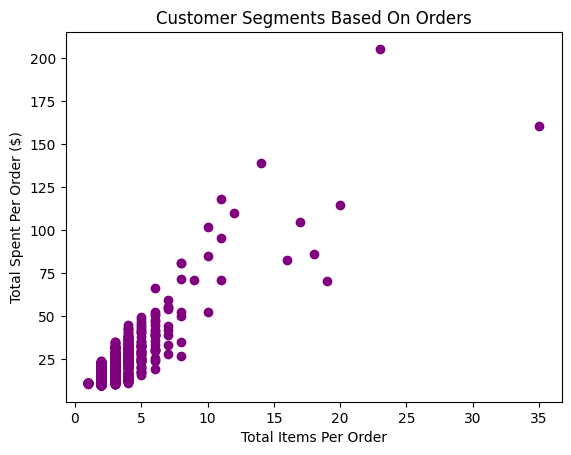

In [28]:
# Comparing Total Spent per Order and Total Items per Order

plt.scatter(ordered_data['Total_Items'], ordered_data['Total_Spent'], color= 'purple')
plt.xlabel('Total Items Per Order')
plt.ylabel('Total Spent Per Order ($)')
plt.title('Customer Segments Based On Orders')
plt.show()